# CHRONIC KIDNEY DISEASE PREDICTOR

# 1)Import Libraries 

In [2]:
import numpy as np
import pandas as pd

# 2)Read the Dataset

In [3]:
kidney = pd.read_csv('kidney_disease.csv')

In [4]:
pd.pandas.set_option('display.max_columns',None)

In [5]:
kidney.head(1)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd


In [6]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# 3) Covert the object data type with textual data into binary format

In [8]:
kidney['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [9]:
kidney['rbc'] = kidney['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [10]:
kidney['pc'].value_counts()

normal      259
abnormal     76
Name: pc, dtype: int64

In [11]:
kidney['pc'] = kidney['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

In [12]:
kidney['pcc'].value_counts()

notpresent    354
present        42
Name: pcc, dtype: int64

In [13]:
kidney['pcc'] = kidney['pcc'].replace(to_replace = {'notpresent' : 0, 'present' : 1})

In [14]:
kidney['ba'].value_counts()

notpresent    374
present        22
Name: ba, dtype: int64

In [15]:
kidney['ba'] = kidney['ba'].replace(to_replace = {'notpresent' : 0, 'present' : 1})

In [16]:
kidney['htn'].value_counts()

no     251
yes    147
Name: htn, dtype: int64

In [17]:
kidney['htn'] = kidney['htn'].replace(to_replace = {'no' : 0, 'yes' : 1})

In [18]:
kidney['dm'].value_counts()

no       258
yes      134
\tno       3
\tyes      2
 yes       1
Name: dm, dtype: int64

In [19]:
kidney['dm'] = kidney['dm'].replace(to_replace ={'\tyes':'yes', ' yes':'yes', '\tno':'no'})

In [20]:
kidney['dm'] = kidney['dm'].replace(to_replace = {'no' : 0, 'yes' : 1,})

In [21]:
kidney['dm'].value_counts()

0.0    261
1.0    137
Name: dm, dtype: int64

In [22]:
kidney['cad'].value_counts()

no      362
yes      34
\tno      2
Name: cad, dtype: int64

In [23]:
kidney['cad'] = kidney['cad'].replace(to_replace = {'\tno':'no'})

In [24]:
kidney['cad'] =kidney['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [25]:
kidney['appet'].value_counts()

good    317
poor     82
Name: appet, dtype: int64

In [26]:
kidney['appet'] = kidney['appet'].replace(to_replace = {'good' : 1, 'poor' : 0,'no' :np.nan})

In [27]:
kidney['pe'].value_counts()

no     323
yes     76
Name: pe, dtype: int64

In [28]:
kidney['pe'] =kidney['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [29]:
kidney['ane'].value_counts()

no     339
yes     60
Name: ane, dtype: int64

In [30]:
kidney['ane'] =kidney['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

In [31]:
kidney['classification'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: classification, dtype: int64

In [32]:
kidney['classification'] = kidney['classification'].replace(to_replace ={'ckd\t':'ckd'})

In [33]:
kidney['classification'] =kidney['classification'].replace(to_replace = {'ckd' : 1, 'notckd' : 0})

# 4) Convert Object type with numerical data into binary format

In [34]:
kidney['pcv'] = pd.to_numeric(kidney['pcv'], errors='coerce')
kidney['wc'] = pd.to_numeric(kidney['wc'], errors='coerce')
kidney['rc'] = pd.to_numeric(kidney['rc'], errors='coerce')

#errors = 'coerce' => skip any null values present

In [35]:
kidney.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object

# 5) Handling Null Values

In [36]:
kidney.isnull().any()

id                False
age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool

In [37]:
kidney.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [38]:
paramters =  ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [39]:
for parameter in paramters:
    kidney[parameter] = kidney[parameter].fillna(kidney[parameter].median())

#fill null values with median

In [40]:
kidney.isnull().any()

id                False
age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool

In [41]:
kidney.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [42]:
kidney.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# 6) Drop Unnecessary Columns

In [43]:
kidney.drop(['id'],axis='columns',inplace = True)

# 7) Split data into dependent and Independent Variables

In [44]:
x = kidney.iloc[:, :24]
y = kidney.iloc[:, 24:25]

In [45]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0


In [46]:
y

,classification
0,1
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,0
398,0


In [47]:
x.shape

(400, 24)

In [48]:
y.shape

(400, 1)

# 8) Finding Significant Parameters

C:\Users\Kkira\AppData\Local\Temp\ipykernel_7572\51642617.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  signifier.fit(x,y)


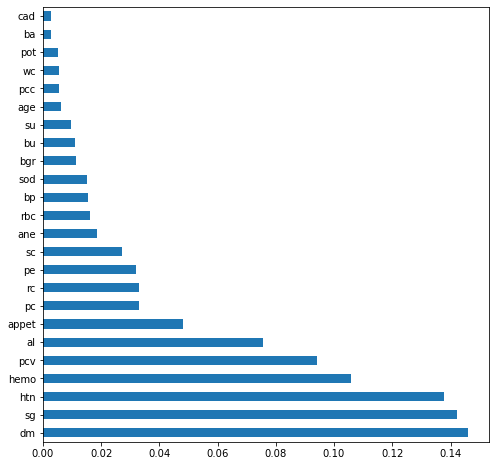

In [49]:
#Parameter Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

signifier=ExtraTreesClassifier()
signifier.fit(x,y)

plt.figure(figsize=(8,8))
parameter_ranks=pd.Series(signifier.feature_importances_,index=x.columns)
parameter_ranks.nlargest(24).plot(kind='barh')
plt.show()

In [50]:
parameter_ranks.nlargest(8).index #taking in top eight ranked parameters

Index(['dm', 'sg', 'htn', 'hemo', 'pcv', 'al', 'appet', 'pc'], dtype='object')

In [51]:
x = kidney[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]

In [52]:
x.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


# 9) Splitting data into train and test

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [54]:
x_train.shape

(320, 8)

In [55]:
x_test.shape

(80, 8)

# 10)Model Building 

In [56]:
from sklearn.linear_model import LogisticRegression
logregtrain = LogisticRegression()

In [57]:
logregtrain.fit(x_train, y_train)

C:\Users\Kkira\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

# 11) Model Testing

In [58]:
logregtest = logregtrain.predict(x_test)

In [59]:
pred_manual = logregtrain.predict([[1.02,1,15.4,1,1.0,1,5.2,1]])

C:\Users\Kkira\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [69]:
pred_manual

array([1], dtype=int64)

In [60]:
logregtest

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [61]:
y_test

,classification
132,1
309,0
341,0
196,1
246,1
...,...
14,1
363,0
304,0
361,0


# 12) Accuracy

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, logregtest)

In [63]:
accuracy*100

97.5

#  Model Accuracy : 97.5%

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(logregtest, y_test)

In [65]:
cm

array([[28,  2],
       [ 0, 50]], dtype=int64)

# 13)AUC-ROC Curves

In [66]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, logregtest)
auc_roc = metrics.auc(fpr,tpr)

In [67]:
auc_roc

0.9807692307692308

In [68]:
# value almost equal to 1 ---> best model

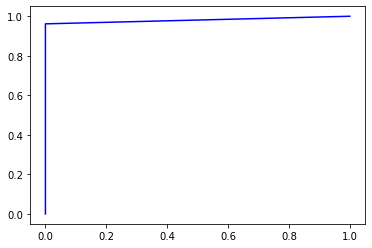

In [71]:
plt.plot(fpr, tpr, 'b' , label="AOC =%.2f"%auc_roc)

In [72]:
import pickle
pickle.dump(logregtrain,open('ckd.pkl','wb'))